<a href="https://colab.research.google.com/github/HiRenan/BigData/blob/main/BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✔️ Obtenção dos Dados: Telco Customer Churn

Para este projeto, utilizaremos o conjunto de dados **"Telco Customer Churn"**, disponibilizado publicamente na plataforma Kaggle. O dataset contém informações demográficas, de serviços contratados e financeiras de clientes de uma empresa de telecomunicações, sendo um recurso clássico para a construção de modelos preditivos de churn.

### 🔐 Acesso via API da Kaggle

Para garantir um processo automatizado, reprodutível e que utiliza a versão mais recente do conjunto de dados, optou-se por usar a **API oficial da Kaggle**. O processo é dividido em cinco etapas:

1.  **Upload da chave de autenticação** `kaggle.json` (gerada na conta do usuário na Kaggle);
2.  **Configuração do ambiente** para autenticação com as permissões corretas;
3.  **Instalação do pacote** `kaggle` para acesso via linha de comando;
4.  **Download e extração** do arquivo compactado (`.zip`);
5.  **Leitura do arquivo principal** `.csv` para um DataFrame do Pandas.

### 🔽 Etapa 1: Upload e Configuração do `kaggle.json`

Para acessar datasets diretamente da Kaggle via API, é necessário realizar a autenticação com uma **chave de acesso pessoal** no formato `kaggle.json`.

📌 **Como gerar o arquivo `kaggle.json`:**
1.  Acesse sua conta no site da **[Kaggle](https://www.kaggle.com/)**.
2.  No canto superior direito, clique na sua foto de perfil e selecione **"Settings"**.
3.  Role a página até a seção **"API"** e clique em **"Create New API Token"**.
4.  Um arquivo chamado `kaggle.json` será baixado automaticamente para o seu computador.

Este arquivo contém suas credenciais e **deve ser mantido em segurança**.

No Google Colab, usamos o código abaixo para abrir a interface de upload de arquivos e enviar o `kaggle.json`:

In [ ]:
from google.colab import files
import os
import zipfile

print("Por favor, faça o upload do seu arquivo 'kaggle.json' gerado no site da Kaggle.")

# Abre a janela de upload para você selecionar o arquivo
uploaded = files.upload()

# Verificação simples
if 'kaggle.json' in uploaded:
    print("\n✅ Arquivo 'kaggle.json' carregado com sucesso!")
else:
    raise ValueError("Upload falhou ou o arquivo não se chama 'kaggle.json'. Tente novamente.")

Por favor, faça o upload do seu arquivo 'kaggle.json' gerado no site da Kaggle.


Saving kaggle.json to kaggle.json

✅ Arquivo 'kaggle.json' carregado com sucesso!


### ⚙️ Etapa 2: Mover e Configurar o Arquivo de Autenticação

Com o arquivo de autenticação em nosso ambiente, o próximo passo é movê-lo para o diretório esperado pela API da Kaggle (`~/.kaggle/`) e atribuir as permissões corretas para garantir que apenas o usuário atual possa ler e escrever no arquivo (`chmod 600`).

In [ ]:
# Cria o diretório oculto '.kaggle' na pasta raiz do usuário
!mkdir -p ~/.kaggle

# Move o arquivo kaggle.json para o diretório recém-criado
!mv kaggle.json ~/.kaggle/

# Define as permissões corretas para o arquivo
!chmod 600 ~/.kaggle/kaggle.json

print("✅ Ambiente Kaggle configurado com sucesso!")

✅ Ambiente Kaggle configurado com sucesso!


### 📦 Etapa 3: Instalar o Pacote Kaggle

Agora, instalamos a biblioteca oficial da Kaggle em nosso ambiente Colab.

In [ ]:
!pip install -q kaggle

print("✅ Biblioteca Kaggle instalada.")

✅ Biblioteca Kaggle instalada.


### 📥 Etapa 4: Baixar e Extrair o Dataset

Com tudo configurado, utilizamos o comando da CLI da Kaggle para baixar o dataset "Telco Customer Churn". Em seguida, descompactamos o arquivo `.zip` para uma pasta de destino, deixando os dados prontos para serem lidos.

In [ ]:
# Comando da API específico para o dataset "Telco Customer Churn"
!kaggle datasets download -d blastchar/telco-customer-churn

print("\nDownload do dataset concluído.")

# Define o nome do arquivo .zip e da pasta de destino
zip_file_name = "telco-customer-churn.zip"
extract_folder_name = "telco_data"

# Cria a pasta de destino se ela não existir
if not os.path.exists(extract_folder_name):
    os.makedirs(extract_folder_name)

# Extrai o conteúdo do .zip para a pasta criada
with zipfile.ZipFile(zip_file_name, "r") as zip_ref:
    zip_ref.extractall(extract_folder_name)

print(f"✅ Arquivos extraídos com sucesso para a pasta '{extract_folder_name}'.")

# Lista os arquivos na pasta para verificação
print("\nArquivos na pasta de destino:")
!ls -l {extract_folder_name}

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 366MB/s]

Download do dataset concluído.
✅ Arquivos extraídos com sucesso para a pasta 'telco_data'.

Arquivos na pasta de destino:
total 956
-rw-r--r-- 1 root root 977501 Jul 31 23:23 WA_Fn-UseC_-Telco-Customer-Churn.csv


### 📊 Etapa 5: Leitura do Arquivo e Carga no Pandas

Finalmente, com o arquivo `.csv` disponível em nosso ambiente, utilizamos a biblioteca **Pandas** para carregá-lo em um DataFrame. Esta estrutura de dados é o ponto de partida para toda a nossa análise e modelagem.

In [ ]:
import pandas as pd

# O caminho para o arquivo agora inclui a pasta onde foi extraído
file_path = 'telco_data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

try:
    df = pd.read_csv(file_path)
    print("\n✅ Dataset carregado no DataFrame 'df' com sucesso!")
    print("\nAmostra dos dados:")
    display(df.head())
except FileNotFoundError:
    print(f"❌ Erro: O arquivo não foi encontrado em '{file_path}'. Verifique o nome do arquivo na célula anterior.")


✅ Dataset carregado no DataFrame 'df' com sucesso!

Amostra dos dados:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 📊 Etapa 6: Iniciando análise exploratória do dataset carregado


In [ ]:
# Ver quantos valores ficaram como NaN (erros na conversão)
df['TotalCharges'].isna().sum()

df = df.dropna(subset=['TotalCharges'])

# Verificar os tipos de dados na coluna Churn, e alterar para modelo binário, com isso facilitando a leitura ao usar a LLM.
print(df['Churn'].unique())

df = df.replace({'Churn': {'No': 0, 'Yes': 1}})
# Verificar transformação
df['Churn'].isna().sum()

['No' 'Yes']


/tmp/ipython-input-2080867524.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Churn': {'No': 0, 'Yes': 1}})


np.int64(0)

Ambiente de Análise Pronto. Iniciando o processo...

>>> Etapa 1: Preparação e Limpeza dos Dados
Dados limpos e preparados.

>>> Etapa 2: Análise Descritiva (Estatísticas)...

--- Estatísticas das Variáveis Numéricas ---


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000



--- Moda das Variáveis Numéricas ---


,0
tenure,1.00
MonthlyCharges,20.05
TotalCharges,20.20



--- Variância das Variáveis Numéricas ---


,0
tenure,6.024698e+02
MonthlyCharges,9.051658e+02
TotalCharges,5.138252e+06



>>> Etapa 3: Análise Visual Univariada...


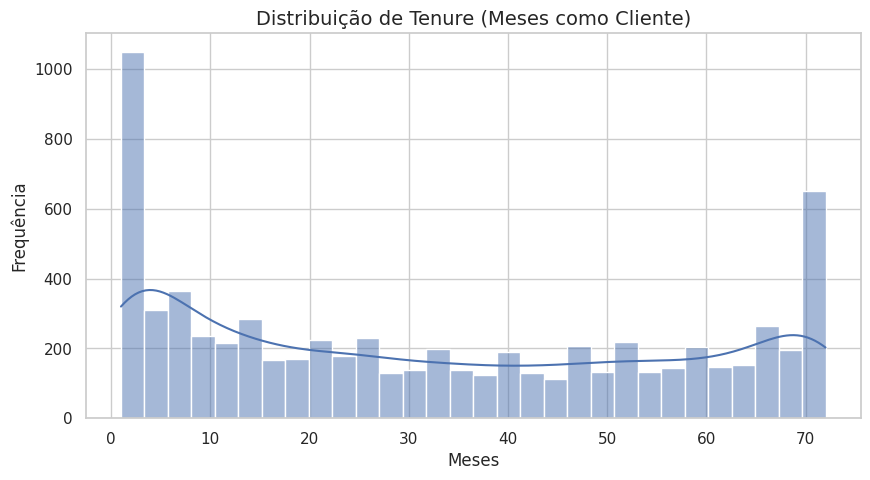

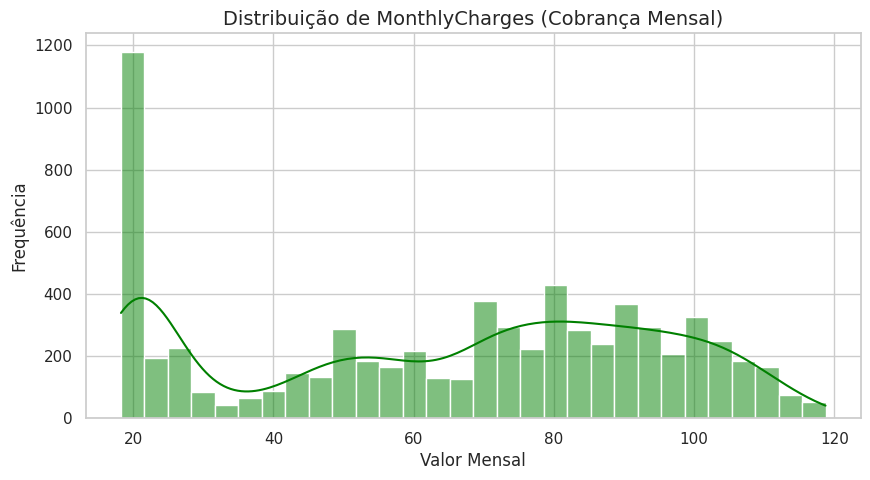

/tmp/ipython-input-1421380620.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


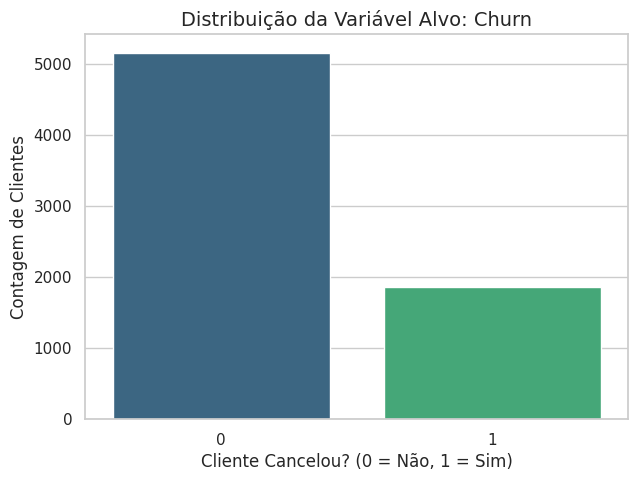


>>> Etapa 4: Análise Visual Bivariada (Insights de Churn)...


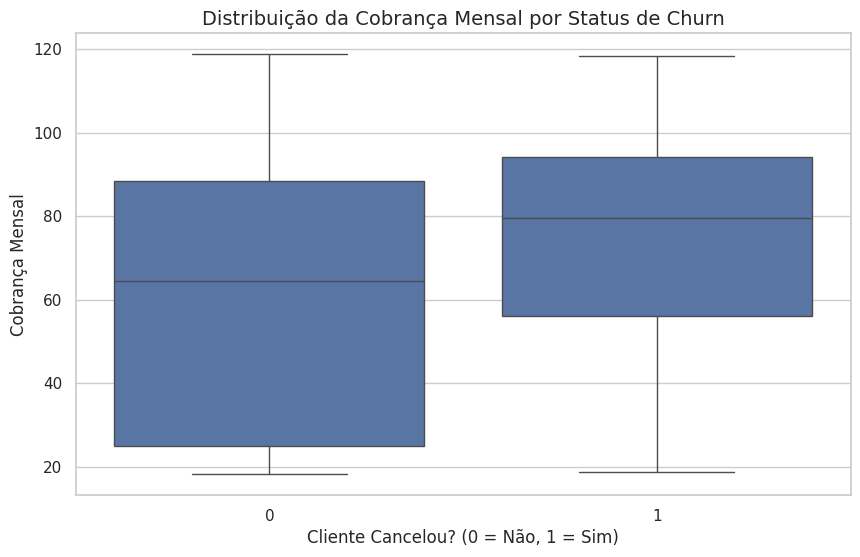

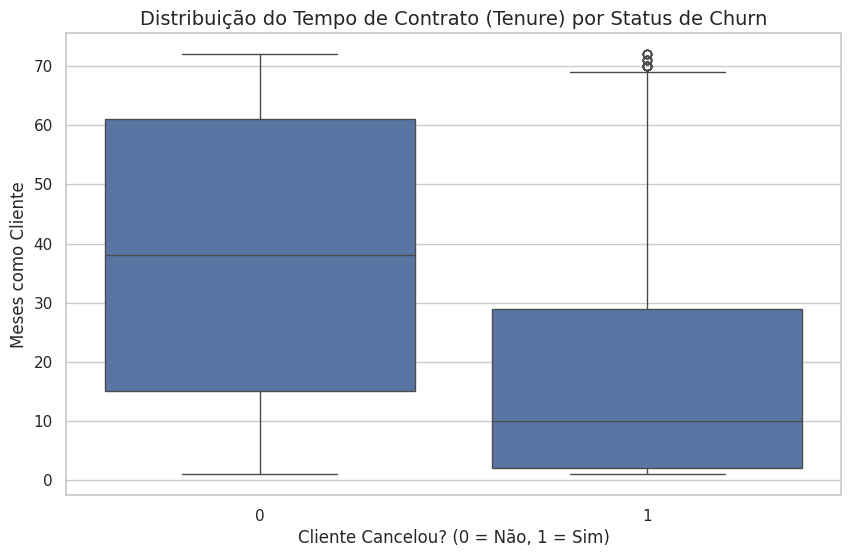

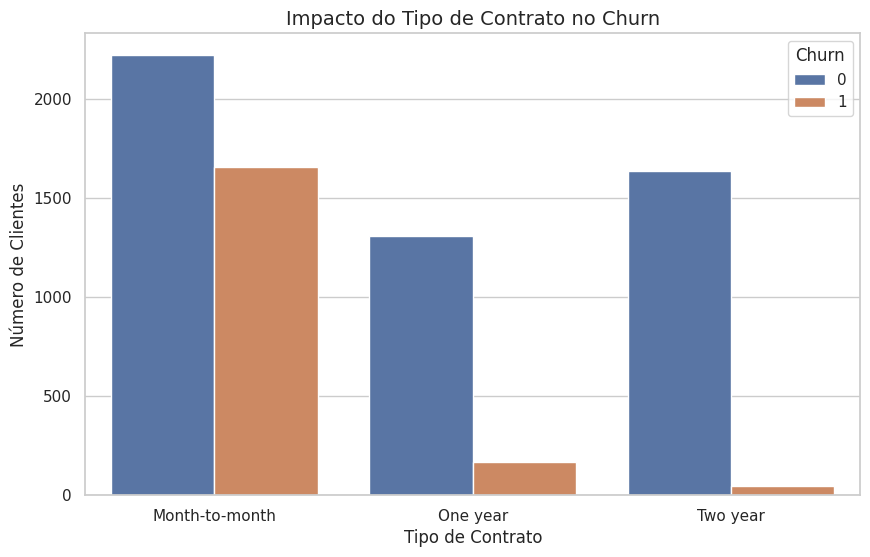

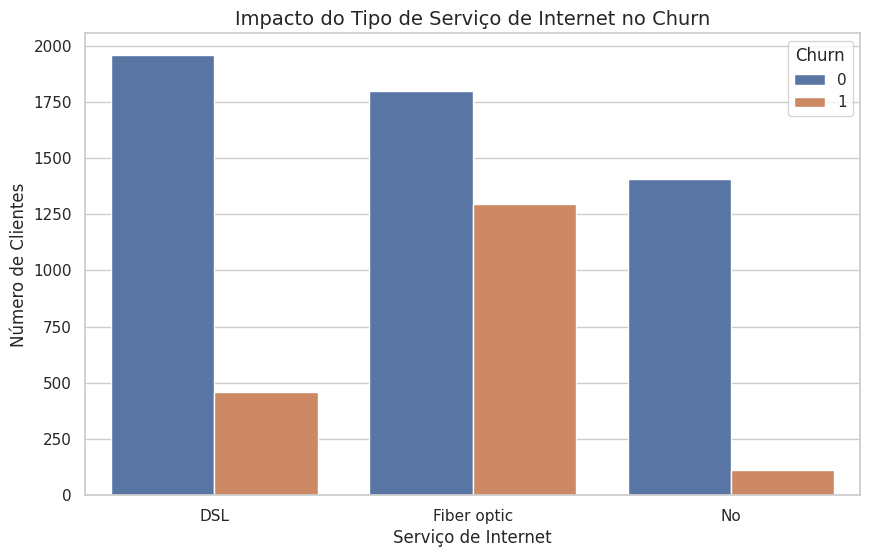

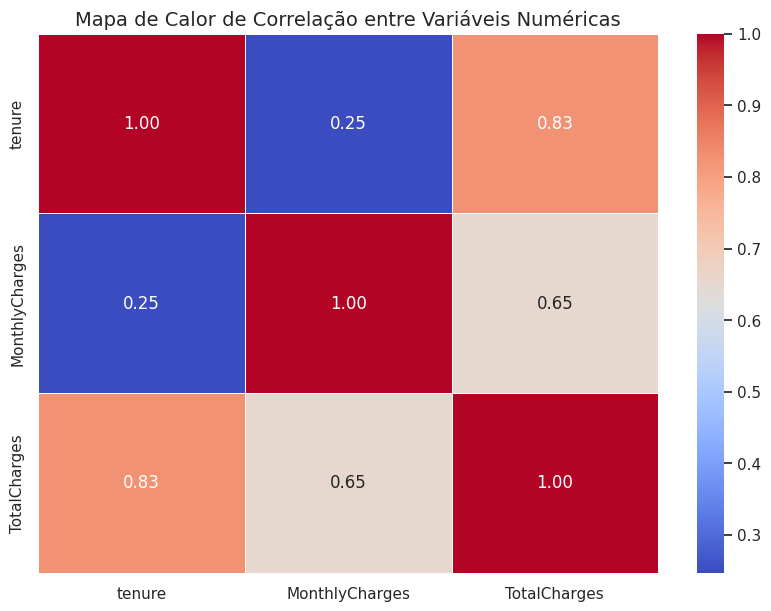


>>> Etapa 5: Conclusões e Insights Preliminares...

INSIGHTS PRELIMINARES CONFIRMADOS E EXPANDIDOS:
- Clientes com contrato mensal ('Month-to-month') apresentam uma taxa de churn drasticamente maior.
- Clientes com cobranças mensais mais altas tendem a cancelar mais, como visto no boxplot.
- Clientes com menor tempo de contrato ('tenure') são muito mais propensos ao churn.
- O serviço de 'Fiber optic' (Fibra Ótica) tem uma taxa de churn consideravelmente maior que o de 'DSL'.
- Não há correlação forte entre o valor da cobrança mensal e o tempo de contrato.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
print("Ambiente de Análise Pronto. Iniciando o processo...\n")

# ETAPA 1: PREPARAÇÃO E LIMPEZA DOS DADOS PARA ANÁLISE
print(">>> Etapa 1: Preparação e Limpeza dos Dados")

# Corrigir a coluna TotalCharges, convertendo para numérico. Erros virarão NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remover as 11 linhas onde TotalCharges era nulo (clientes com tenure 0)
df.dropna(subset=['TotalCharges'], inplace=True)

# Transformar a coluna 'Churn' em binário (0 para 'No', 1 para 'Yes')
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
print("Dados limpos e preparados.\n")

# ETAPA 2: ANÁLISE DESCRITIVA (ESTATÍSTICAS)

print(">>> Etapa 2: Análise Descritiva (Estatísticas)...")

print("\n--- Estatísticas das Variáveis Numéricas ---")
display(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

print("\n--- Moda das Variáveis Numéricas ---")
display(df[['tenure', 'MonthlyCharges', 'TotalCharges']].mode().iloc[0])

print("\n--- Variância das Variáveis Numéricas ---")
display(df[['tenure', 'MonthlyCharges', 'TotalCharges']].var())

# ETAPA 3: ANÁLISE VISUAL UNIVARIADA (Analisando uma variável por vez)

print("\n>>> Etapa 3: Análise Visual Univariada...")

# Histograma para Tenure
plt.figure(figsize=(10, 5))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribuição de Tenure (Meses como Cliente)', fontsize=14)
plt.xlabel('Meses')
plt.ylabel('Frequência')
plt.savefig('univariada_hist_tenure.png', transparent=True)
plt.show()

# Histograma para MonthlyCharges
plt.figure(figsize=(10, 5))
sns.histplot(df['MonthlyCharges'], bins=30, color='green', kde=True)
plt.title('Distribuição de MonthlyCharges (Cobrança Mensal)', fontsize=14)
plt.xlabel('Valor Mensal')
plt.ylabel('Frequência')
plt.savefig('univariada_hist_monthlycharges.png', transparent=True)
plt.show()

# Gráfico de Barras para a variável Churn (visualizar desbalanceamento)
plt.figure(figsize=(7, 5))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribuição da Variável Alvo: Churn', fontsize=14)
plt.xlabel('Cliente Cancelou? (0 = Não, 1 = Sim)')
plt.ylabel('Contagem de Clientes')
plt.savefig('univariada_countplot_churn.png', transparent=True)
plt.show()

# ETAPA 4: ANÁLISE VISUAL BIVARIADA (Cruzando variáveis com Churn)

print("\n>>> Etapa 4: Análise Visual Bivariada (Insights de Churn)...")

# Boxplot de MonthlyCharges vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Distribuição da Cobrança Mensal por Status de Churn', fontsize=14)
plt.xlabel('Cliente Cancelou? (0 = Não, 1 = Sim)')
plt.ylabel('Cobrança Mensal')
plt.savefig('bivariada_boxplot_monthlycharges_churn.png', transparent=True)
plt.show()

# Boxplot de Tenure vs Churn (Sugestão de melhoria)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Distribuição do Tempo de Contrato (Tenure) por Status de Churn', fontsize=14)
plt.xlabel('Cliente Cancelou? (0 = Não, 1 = Sim)')
plt.ylabel('Meses como Cliente')
plt.savefig('bivariada_boxplot_tenure_churn.png', transparent=True)
plt.show()

# Gráfico de barras de Tipo de Contrato vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Impacto do Tipo de Contrato no Churn', fontsize=14)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.savefig('bivariada_countplot_contract_churn.png', transparent=True)
plt.show()

# Gráfico de barras de InternetService vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Impacto do Tipo de Serviço de Internet no Churn', fontsize=14)
plt.xlabel('Serviço de Internet')
plt.ylabel('Número de Clientes')
plt.savefig('bivariada_countplot_internet_churn.png', transparent=True)
plt.show()

# Heatmap de Correlação
plt.figure(figsize=(10, 7))
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlação entre Variáveis Numéricas', fontsize=14)
plt.savefig('bivariada_heatmap_correlacao.png', transparent=True)
plt.show()

# ETAPA 5: CONCLUSÕES E INSIGHTS PRELIMINARES

print("\n>>> Etapa 5: Conclusões e Insights Preliminares...")
print("""
INSIGHTS PRELIMINARES CONFIRMADOS E EXPANDIDOS:
- Clientes com contrato mensal ('Month-to-month') apresentam uma taxa de churn drasticamente maior.
- Clientes com cobranças mensais mais altas tendem a cancelar mais, como visto no boxplot.
- Clientes com menor tempo de contrato ('tenure') são muito mais propensos ao churn.
- O serviço de 'Fiber optic' (Fibra Ótica) tem uma taxa de churn consideravelmente maior que o de 'DSL'.
- Não há correlação forte entre o valor da cobrança mensal e o tempo de contrato.
""")

### 📊 ETAPA 7: PRÉ-PROCESSAMENTO COMPLETO (Engenharia de Atributos em todas as variáveis)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

print(">>> Etapa 7: Pré-processamento Completo...")

# Manter uma cópia do dataframe limpo
df_processado = df.copy()

# 1. One-Hot Encoding para variáveis categóricas
colunas_categoricas = df_processado.select_dtypes(include='object').columns.tolist()
colunas_categoricas.remove('customerID') # Remover o identificador
df_processado = pd.get_dummies(df_processado, columns=colunas_categoricas, drop_first=True)

# 2. Padronização das variáveis numéricas
colunas_continuas = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_processado[colunas_continuas] = scaler.fit_transform(df_processado[colunas_continuas])

print("Pré-processamento de todas as variáveis concluído.\n")

>>> Etapa 7: Pré-processamento Completo...
Pré-processamento de todas as variáveis concluído.



### 📊 ETAPA 8: SELEÇÃO DE VARIÁVEIS (Feature Selection) USANDO RANDOM FOREST


In [ ]:
print(">>> Etapa 8: Descobrindo as variáveis mais importantes...")

# 1. Separar o dataset completo em X e y
X_full = df_processado.drop(columns=['customerID', 'Churn'])
y_full = df_processado['Churn']

# 2. Treinar um modelo Random Forest inicial com TODAS as variáveis
modelo_rf_inicial = RandomForestClassifier(random_state=42)
modelo_rf_inicial.fit(X_full, y_full)

# 3. Extrair e visualizar a importância de cada variável
importancias = modelo_rf_inicial.feature_importances_
nomes_features = X_full.columns
df_importancias = pd.DataFrame({'feature': nomes_features, 'importance': importancias}).sort_values(by='importance', ascending=False)

print("\n--- Importância de Todas as Variáveis (do maior para o menor) ---")
display(df_importancias.head(10)) # Mostrando as 10 mais importantes

# 4. Selecionar programaticamente as Top 6 variáveis
colunas_top6_selecionadas = df_importancias['feature'].head(6).tolist()
print("\n--- As 6 variáveis selecionadas para o modelo final são: ---")
print(colunas_top6_selecionadas)


>>> Etapa 8: Descobrindo as variáveis mais importantes...

--- Importância de Todas as Variáveis (do maior para o menor) ---


,feature,importance
3,TotalCharges,0.192888
1,tenure,0.175266
2,MonthlyCharges,0.173414
28,PaymentMethod_Electronic check,0.035710
10,InternetService_Fiber optic,0.034655
25,Contract_Two year,0.030305
4,gender_Male,0.028237
13,OnlineSecurity_Yes,0.027848
26,PaperlessBilling_Yes,0.026074
19,TechSupport_Yes,0.023195



--- As 6 variáveis selecionadas para o modelo final são: ---
['TotalCharges', 'tenure', 'MonthlyCharges', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'Contract_Two year']


### 📊 ETAPA 9: PREPARAÇÃO FINAL E DIVISÃO TREINO/TESTE (COM AS TOP 6 VARIÁVEIS)


In [ ]:
print("\n>>> Etapa 9: Preparando dados finais e dividindo em treino/teste...")

# 1. Criar o DataFrame final apenas com as colunas selecionadas
X = df_processado[colunas_top6_selecionadas]
y = df_processado['Churn'] # A variável alvo continua a mesma

# 2. Dividir em treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"Divisão concluída. Formato de X_train: {X_train.shape}")


>>> Etapa 9: Preparando dados finais e dividindo em treino/teste...
Divisão concluída. Formato de X_train: (5625, 6)


### 📊 ETAPA 10: TREINAMENTO E AVALIAÇÃO DOS MODELOS FINAIS


In [ ]:
print("\n>>> Etapa 10: Treinando e avaliando os modelos finais...")

# 1. Regressão Logística
modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

# 2. Random Forest
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

print("Treinamento concluído.")

# 3. Avaliação dos Modelos
relatorio_lr = classification_report(y_test, y_pred_lr, output_dict=True)
relatorio_rf = classification_report(y_test, y_pred_rf, output_dict=True)
auc_lr = roc_auc_score(y_test, modelo_lr.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:, 1])


>>> Etapa 10: Treinando e avaliando os modelos finais...
Treinamento concluído.


### 📊 ETAPA 11: COMPARAÇÃO DE RESULTADOS E ANÁLISE FINAL


>>> Etapa 11: Comparação de Resultados e Análise Final...

--- Tabela Comparativa de Performance dos Modelos ---


,Modelo,Acurácia,Precisão (Churn=1),Recall (Churn=1),F1-Score (Churn=1),AUC
0,Logistic Regression,0.794,0.653,0.479,0.552,0.830
1,Random Forest,0.764,0.564,0.492,0.526,0.778


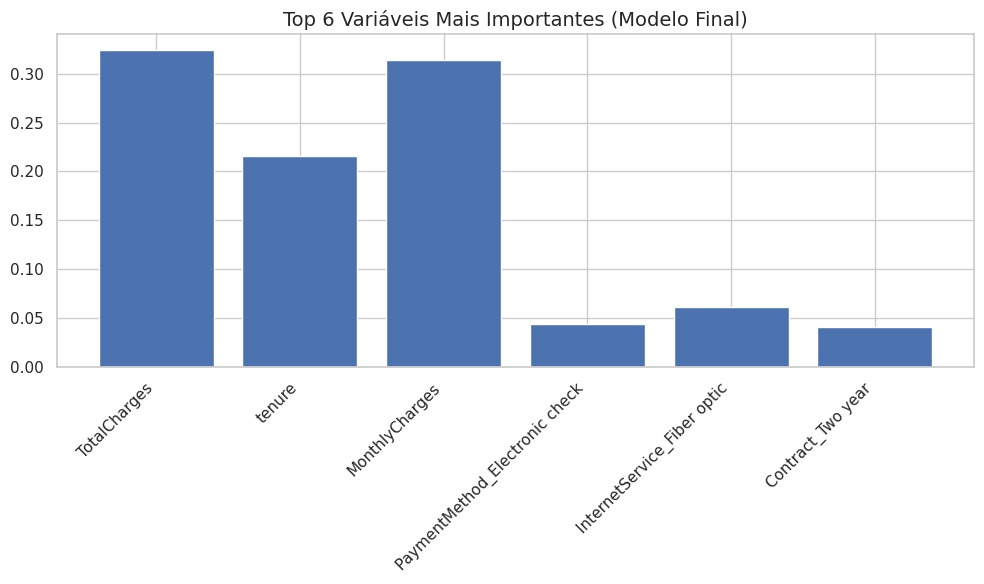

In [ ]:
print("\n>>> Etapa 11: Comparação de Resultados e Análise Final...")

# 1. Tabela Comparativa
resultados = pd.DataFrame({
    "Modelo": ["Logistic Regression", "Random Forest"],
    "Acurácia": [relatorio_lr["accuracy"], relatorio_rf["accuracy"]],
    "Precisão (Churn=1)": [relatorio_lr["1"]["precision"], relatorio_rf["1"]["precision"]],
    "Recall (Churn=1)": [relatorio_lr["1"]["recall"], relatorio_rf["1"]["recall"]],
    "F1-Score (Churn=1)": [relatorio_lr["1"]["f1-score"], relatorio_rf["1"]["f1-score"]],
    "AUC": [auc_lr, auc_rf]
})

print("\n--- Tabela Comparativa de Performance dos Modelos ---")
display(resultados.round(3))


# 2. Gráfico de Importância das Variáveis (do modelo final Random Forest)
plt.figure(figsize=(10,6))
plt.title("Top 6 Variáveis Mais Importantes (Modelo Final)", fontsize=14)
# Como já temos as 6, podemos plotar diretamente
plt.bar(X_train.columns, modelo_rf.feature_importances_)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 🌟 Importância das Variáveis no Modelo Random Forest

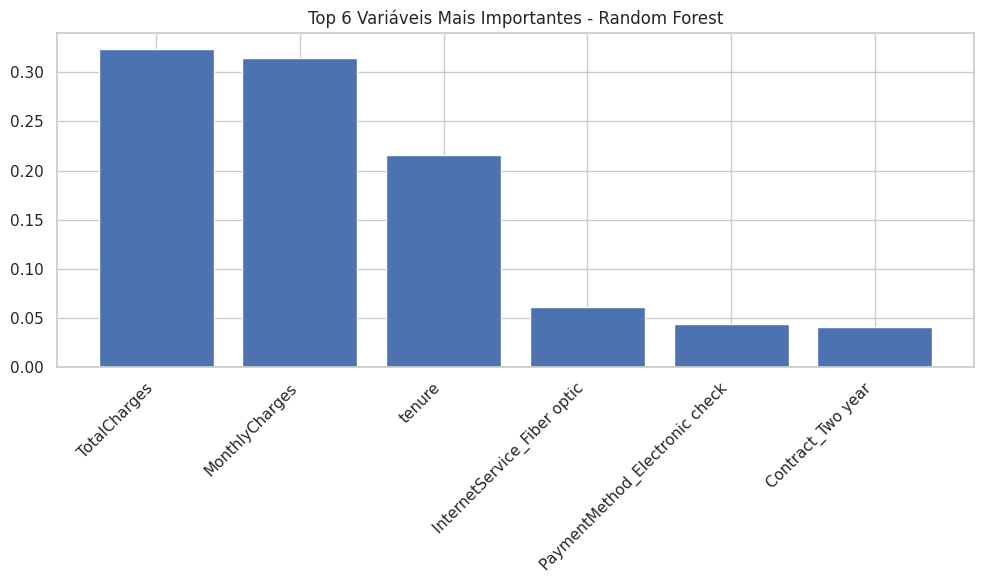

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Obter importâncias das features
importancias = modelo_rf.feature_importances_
nomes_features = X_train.columns

# Ordenar e plotar as 6 mais importantes
indices = np.argsort(importancias)[::-1][:6]
plt.figure(figsize=(10,6))
plt.title("Top 6 Variáveis Mais Importantes - Random Forest")
plt.bar(range(len(indices)), importancias[indices], align="center")
plt.xticks(range(len(indices)), [nomes_features[i] for i in indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()


🧠 INSIGHTS ESTRATÉGICOS DO MODELO DE CHURN

Variável	Possível interpretação
Contract_Two year	Clientes com contrato de 2 anos tendem a ficar mais
tenure	Quanto maior o tempo de casa, menor o churn
MonthlyCharges	Cobranças mensais altas aumentam o churn
InternetService_Fiber optic	Clientes com fibra óptica cancelam mais
PaymentMethod_Electronic check	Pagamentos com boleto/cheque têm maior churn

💡 2. Ações estratégicas recomendadas
🔸 Aumentar retenção por contrato
Incentivar contratos de 2 anos com descontos ou benefícios exclusivos.

Clientes com esse tipo de contrato mostraram menor probabilidade de churn.

🔸 Reduzir o valor percebido das mensalidades
Criar planos mais flexíveis ou com vantagens por fidelidade para clientes com MonthlyCharges mais altos.

🔸 Atuar sobre os primeiros meses
O modelo mostra que clientes com tenure (tempo de contrato) baixo têm alta chance de churn.

Implemente um programa de boas-vindas ou acompanhamento personalizado nos primeiros 3–6 meses.

🔸 Rever a qualidade/percepção da Internet via fibra
Clientes com InternetService_Fiber optic estão mais propensos ao churn.

Avaliar se há:

Problemas técnicos,

Expectativas mal geridas,

Concorrência agressiva nesse segmento.

🔸 Rever métodos de pagamento
Quem usa Electronic check (geralmente boleto ou débito direto) tem maior churn.

Incentivar pagamento automático via cartão ou débito automático pode indicar clientes mais estáveis.

🧭 3. Segmentação para retenção inteligente
Você pode usar o modelo para classificar a base atual em:

🔴 Alto risco de churn → aplicar ações imediatas (ligações, promoções)

🟡 Risco médio → enviar comunicação proativa (e-mail marketing)

🟢 Baixo risco → manter com recompensas por fidelidade

📦 Próximos passos recomendados
Aplicar o modelo em produção e gerar um score de churn para todos os clientes.

Criar um dashboard de monitoramento.

Fazer uma análise de SHAP values para explicabilidade individual.